# Concept of CNN

## Convolutional Neural Network
* CNN is used for image classification, object detection
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="5"></a>
### What is Convolution Operation?
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important bc code runs faster. However, we lost information.
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
### Same Padding
* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* input size and output size are same.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

<a id="7"></a>
### Max Pooling
* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes.
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting.
* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

<a id="8"></a>
### Flattening
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

# MNIST Digit Recognition with CNN

## Imports

In [7]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import transforms

# make sure you connect to GPU runtime of colab
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cuda device


## Preparing Dataset

In [8]:
# hyperparameters
batch_size = 64

In [9]:
# data loaders

train_dataset = torchvision.datasets.MNIST(
    root='./data', download=True, train=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(
    root='./data', download=True, train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 39077891.50it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 56978219.11it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45514856.38it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5496401.84it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [10]:
# show some sample images
def show_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(4, 4, i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(labels[i].item())
        plt.axis('off')
    plt.show()

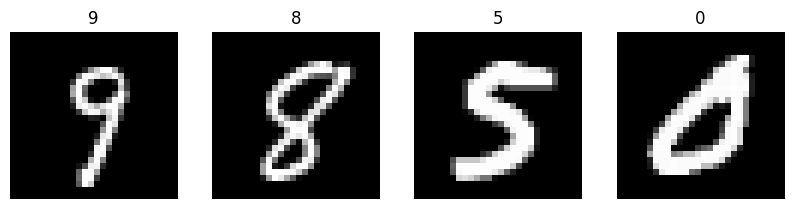

In [11]:
images, labels = next(iter(train_loader))
show_images(images, labels)

## Training

### Defining Model

In [12]:
# some linear models you can try using your own

class LinearNet(nn.Module):
    def __init__(self, in_features=784):
        super().__init__()
        self.fc = nn.Linear(in_features, 10)

    def forward(self, x):
        x = x.flatten(start_dim=1)
        x = self.fc(x)
        return x

class LinearNet2(nn.Module):
    def __init__(self, in_features=784, hidden_layer=256):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(in_features, hidden_layer),
            nn.BatchNorm1d(hidden_layer),
            nn.ReLU(),
            nn.Linear(hidden_layer, hidden_layer),
            nn.BatchNorm1d(hidden_layer),
            nn.ReLU(),
            nn.Linear(hidden_layer, 10)
        )

    def forward(self, x):
        x = x.flatten(start_dim=1)
        return self.fc(x)

In [13]:
# a basic CNN architecture
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, 3, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Linear(32*5*5, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.flatten(start_dim=1)
        x = self.fc(x)
        return x


# better CNN architecture
class ConvNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Linear(128*5*5, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.flatten(start_dim=1)
        x = self.fc(x)
        return x

### Trying Different Models

In [14]:
# 92% accuracy from a linear model batch size = 4, 5 epochs
# model = LinearNet().to(device)
# lr = 1e-3

# 99.35% accuracy from a CNN2
# model = ConvNet2().to(device), batch size = 64, 15 epochs
# lr = 5e-4

# ~99% accuracy from simple CNN
model = ConvNet().to(device)
lr = 5e-4

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [15]:
num_epochs = 10
num_batches = len(train_loader)
num_batches

938

### Training Model

In [16]:
for epoch in range(num_epochs):
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        # move images and labels to device
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        output = model(images)
        loss = criterion(output, labels)

        # backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss

    print(f'Epoch {epoch+1}/{num_epochs} Avg Loss {running_loss/num_batches:.6f}')

Epoch 1/10 Avg Loss 0.288643
Epoch 2/10 Avg Loss 0.083341
Epoch 3/10 Avg Loss 0.057275
Epoch 4/10 Avg Loss 0.044031
Epoch 5/10 Avg Loss 0.035612
Epoch 6/10 Avg Loss 0.029672
Epoch 7/10 Avg Loss 0.023846
Epoch 8/10 Avg Loss 0.020361
Epoch 9/10 Avg Loss 0.016529
Epoch 10/10 Avg Loss 0.013242


## Testing Model

Accuracy of the network: 98.95 %
Accuracy of 0: 99.18 %
Accuracy of 1: 100.00 %
Accuracy of 2: 98.84 %
Accuracy of 3: 99.01 %
Accuracy of 4: 99.29 %
Accuracy of 5: 98.32 %
Accuracy of 6: 98.85 %
Accuracy of 7: 99.51 %
Accuracy of 8: 97.23 %
Accuracy of 9: 99.01 %


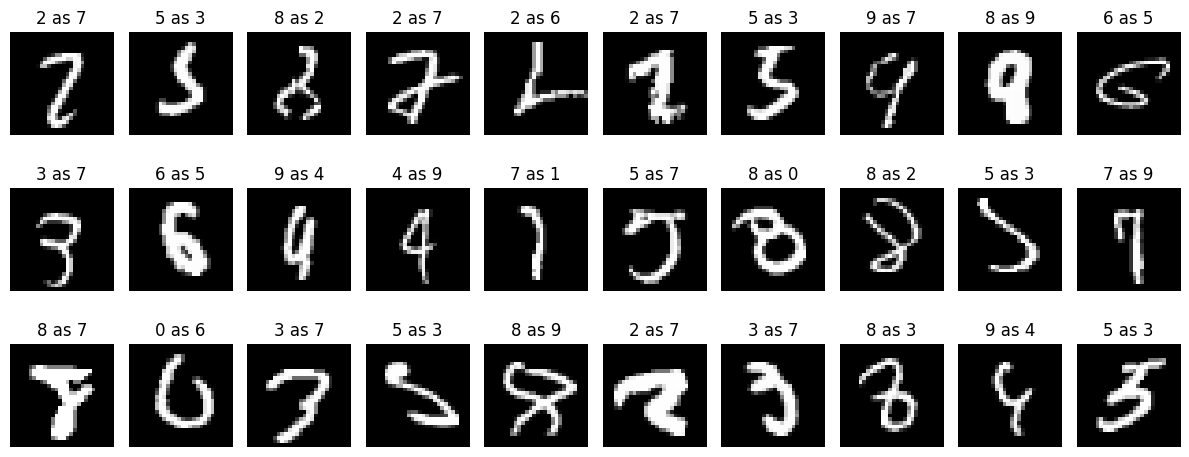

In [17]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]

    # figure for visualization
    rows = 3
    fig, axes = plt.subplots(rows, 10, figsize=(12, 5))
    axes = axes.flatten()
    ctr = 0

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(labels.shape[0]):
            label = labels[i]
            pred = predicted[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

            # visualize wrongly predicted images
            if label != pred and ctr < 10*rows:
                axes[ctr].imshow(images[i, 0].cpu(), cmap='gray')
                axes[ctr].set_title(f'{label.item()} as {pred.item()}')
                axes[ctr].set_axis_off()
                ctr += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc:.2f} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {i}: {acc:.2f} %')

plt.tight_layout()

# Optional

## Visualizing what CNN does

[visual CNN demo](https://transcranial.github.io/keras-js/#/mnist-cnn)

## Using Different Architectures

you can try using different CNN Architectures

### References

https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial

notebook by - Aakash Kumar Singh